In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statistics as stats
%matplotlib inline
import plotly.express as px
import nbformat
from scipy.stats import linregress



In [8]:
Data = pd.read_csv('apple_products.csv')
Data.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


C:\Users\9ayus\AppData\Local\Temp\ipykernel_23272\2473482717.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(),annot=True)


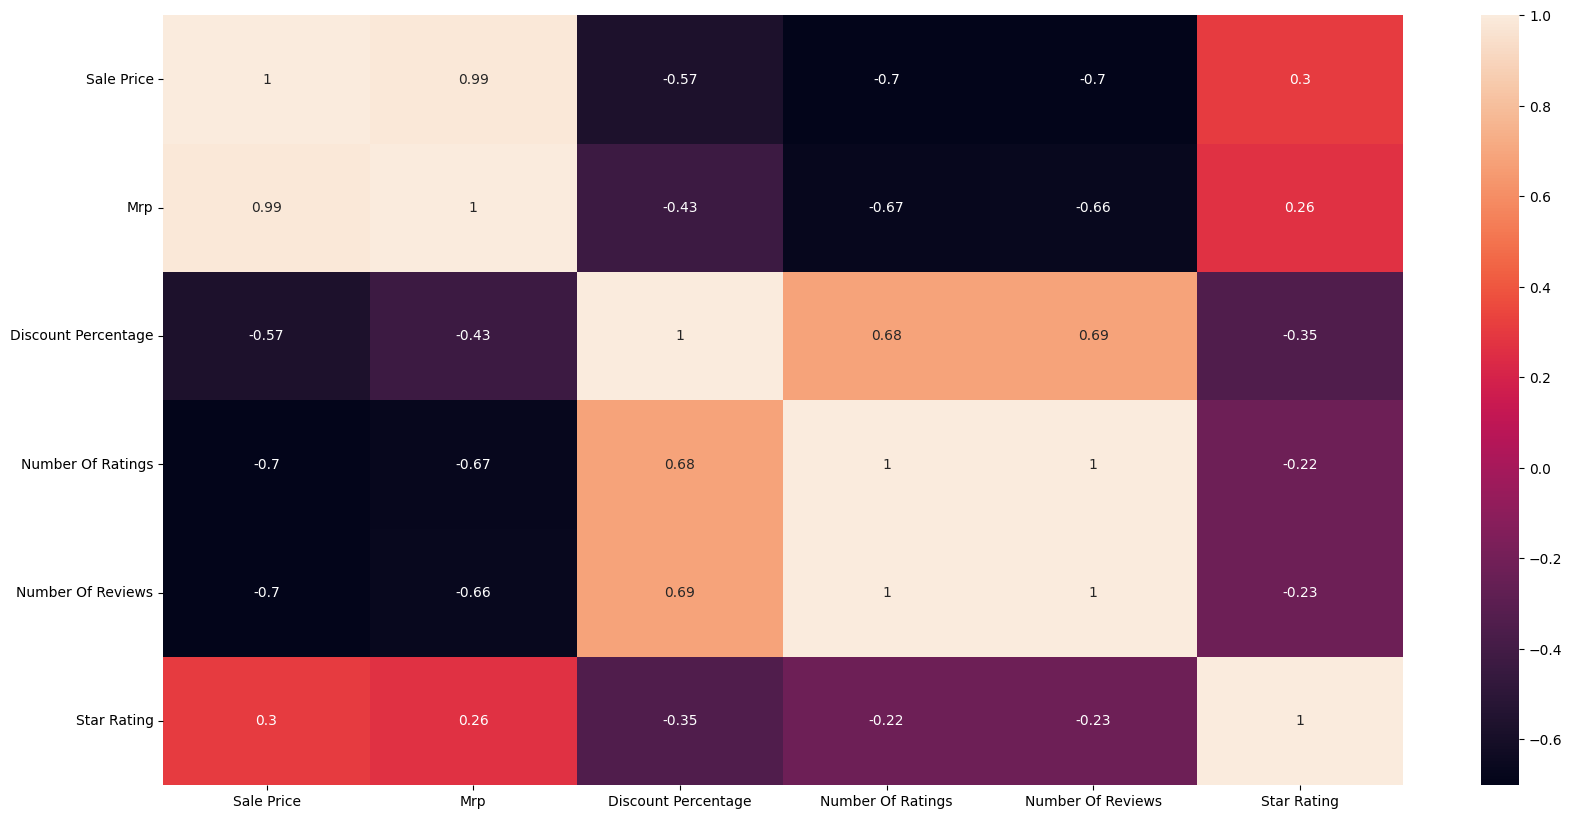

In [9]:
# Correleation Matrix for entire dataset
plt.figure(figsize=(20,10))
sns.heatmap(Data.corr(),annot=True)
plt.show()

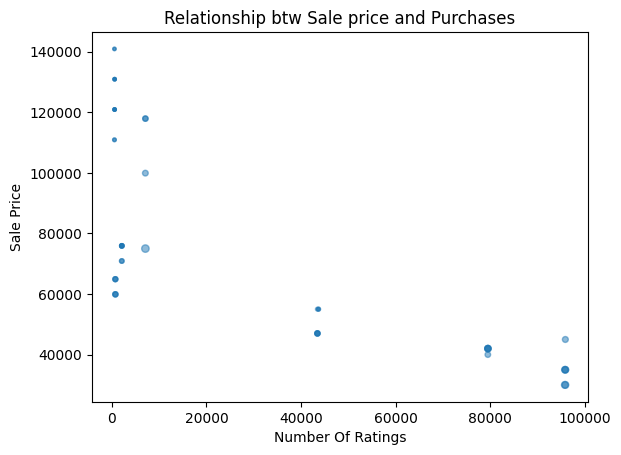

In [47]:
plt.scatter(Data['Number Of Ratings'], Data['Sale Price'], s=Data['Discount Percentage'], alpha=0.5)
plt.title('Relationship btw Sale price and Purchases')
plt.xlabel('Number Of Ratings')
plt.ylabel('Sale Price')
plt.show()

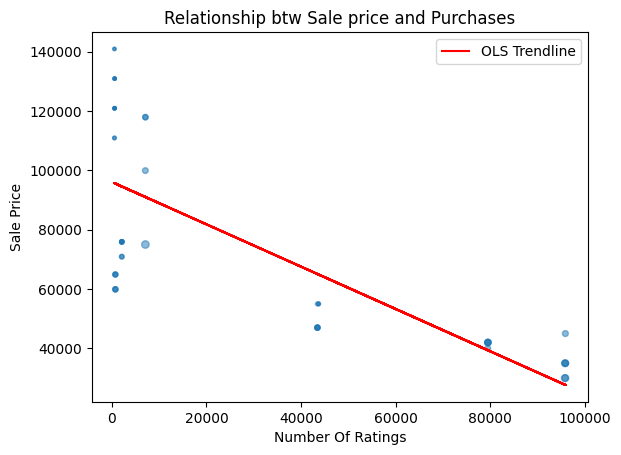

In [20]:
# Define x and y variables
x = Data['Number Of Ratings']
y = Data['Sale Price']
s = Data['Discount Percentage']

# Calculate OLS regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
line = slope*x + intercept

# Create scatter plot with trendline
fig, ax = plt.subplots()
ax.scatter(x, y, s=s, alpha=0.5)
ax.plot(x, line, color='red', label='OLS Trendline')
ax.set_title('Relationship btw Sale price and Purchases')
ax.set_xlabel('Number Of Ratings')
ax.set_ylabel('Sale Price')
ax.legend()

plt.show()




#### According to the trendline we can see that the iphones with most number of ratings are around 40000. Which means people tends to buy iphones with lower sale price.

In [28]:
# Calculate the mean of the 'Number Of Ratings' column
x_mean = Data['Number Of Ratings'].mean()
# x_mean
y_mean = Data['Sale Price'].mean()
# y_mean
print(x_mean)
print(y_mean)

22420.40322580645
80073.8870967742


In [34]:
def b1(Data):
    # Define the x and y values for the line
    x_value = Data['Number Of Ratings']
    y_value = Data['Sale Price']
    x_mean = Data['Number Of Ratings'].mean()
    y_mean = Data['Sale Price'].mean()
    numerator = sum((x_value - x_mean) * (y_value - y_mean)) 
    denominator = sum((x_value - x_mean) ** 2)
    # numerator = sum([(x_mean[i] - x_mean) * (y_mean[i] - y_mean) for i in range(len(Data))])
    # denominator = sum([(x_mean[i] - x_mean)**2 for i in range(len(Data))])
    b1 = numerator / denominator
    return b1
# b1(Data)

print('x mean')
print(x_mean)

print('y mean')
print(y_mean)

print('b1')
print(b1(Data))

print('equation for b0')
print('b0 = y_mean - b1(Data) * x_mean')

b0 = y_mean - b1(Data) * x_mean
print(f'b0 = {b0}')

x mean
22420.40322580645
y mean
80073.8870967742
b1
-0.7127827233737318
equation for b0
b0 = y_mean - b1(Data) * x_mean
b0 = 96054.76316720172


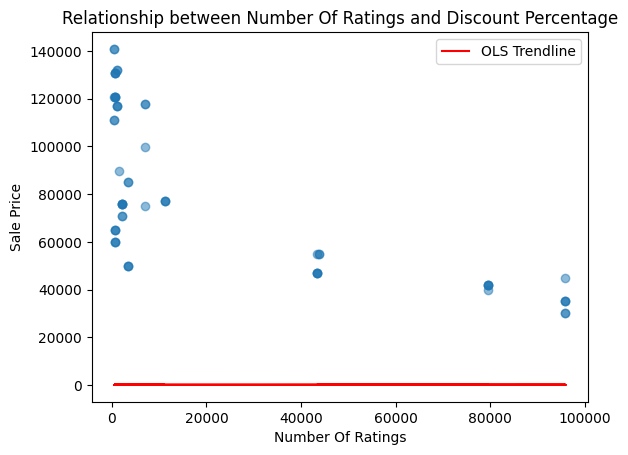

In [60]:
# Define the x and y values for the line
x_value = Data['Number Of Ratings']
y_value = Data['Sale Price']

# Calculate the slope and y-intercept
b1_value = b1(Data)
b0 = y_mean - b1_value * x_mean

# Define the range of x values to plot the line
x_min = x_value.min()
x_max = x_value.max()
x_range = [x_min, x_max]

# Calculate the corresponding y values for the line
y_range = [b1_value * x + b0 for x in x_range]

# Plot the line and the scatter plot of the data
fig, ax = plt.subplots()
ax.scatter(x_value, y_value, alpha=0.5)
ax.plot(x, line, color='red', label='OLS Trendline')
ax.set_title('Relationship between Number Of Ratings and Discount Percentage')
ax.set_xlabel('Number Of Ratings')
ax.set_ylabel('Sale Price')
ax.legend()

plt.show()

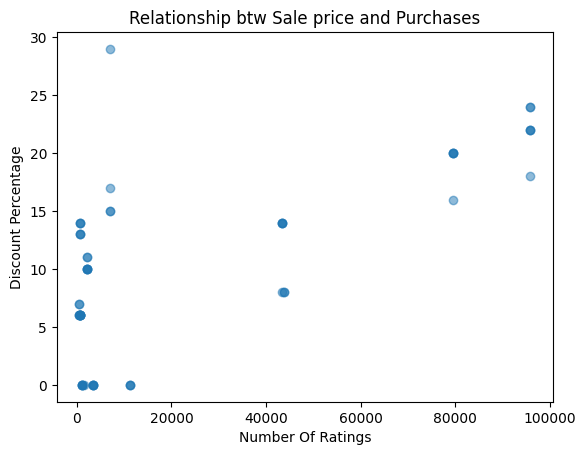

In [56]:
# Relationship between Number Of Ratings and Discount Percentage

plt.scatter(Data['Number Of Ratings'], Data['Discount Percentage'], alpha=0.5)
plt.title('Relationship btw Sale price and Purchases')
plt.xlabel('Number Of Ratings')
plt.ylabel('Discount Percentage')
plt.show()

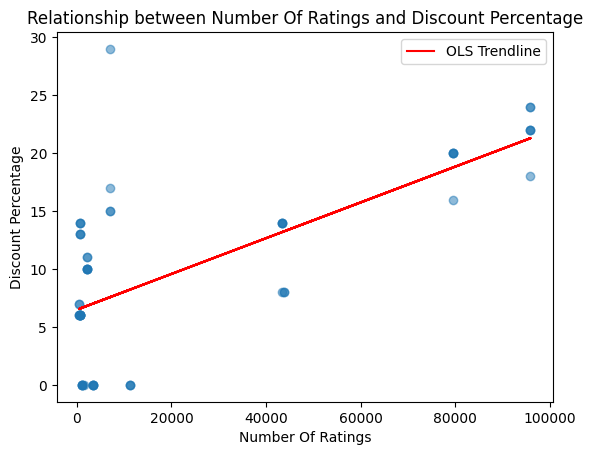

In [62]:
# Define x and y variables
x = Data['Number Of Ratings']
y = Data['Discount Percentage']

# Calculate OLS regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
line = slope*x + intercept

# Create scatter plot with trendline
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5)
ax.plot(x, line, color='red', label='OLS Trendline')
ax.set_title('Relationship between Number Of Ratings and Discount Percentage')
ax.set_xlabel('Number Of Ratings')
ax.set_ylabel('Discount Percentage')
ax.legend()

plt.show()

#### As per the tendline, the phones with greater discount are bought more.